**Instantiating a small convnet**

**Copying images to training, validation, and test directories**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -qq  '/content/drive/MyDrive/Colab_Notebooks/SECONDYEAR_TRIMESTER4_Module03_deep-learning-applications/DAY3_APPLICATION_OF_DEEP_LEARNING/Weather_dataset.zip'

In [ ]:
import tensorflow
from tensorflow import keras
from keras import layers

### Building the model

#FIRST APPROACH:**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                      

**Configuring the model for training**

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["sparse_categorical_accuracy"])

### Data preprocessing

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import os,shutil,pathlib
base_dir=pathlib.Path("/content/Weather_dataset")

datagen=ImageDataGenerator(
rescale=1./255,
validation_split=0.2
)

train_dataset=datagen.flow_from_directory(
directory= base_dir,
subset='training',
class_mode='sparse',
target_size=(180,180),
batch_size=32
)

validation_dataset=datagen.flow_from_directory(
directory= base_dir,
subset='validation',
class_mode='sparse',
target_size=(180,180),
batch_size=32
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [ ]:
classnames=[k for k,v in train_dataset.class_indices.items()]
print("classes:",classnames)

classes: ['cloudy', 'rain', 'shine', 'sunrise']


In [ ]:
classnames=[k for k,v in validation_dataset.class_indices.items()]
print("classes:",classnames)

classes: ['cloudy', 'rain', 'shine', 'sunrise']


**Fitting the model using a `Dataset`**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
29/29 [==============================] - 9s 273ms/step - loss: 1.3810 - sparse_categorical_accuracy: 0.2997 - val_loss: 1.3692 - val_sparse_categorical_accuracy: 0.3170
Epoch 2/30
29/29 [==============================] - 7s 255ms/step - loss: 1.3740 - sparse_categorical_accuracy: 0.3174 - val_loss: 1.3679 - val_sparse_categorical_accuracy: 0.3170
Epoch 3/30
29/29 [==============================] - 7s 252ms/step - loss: 1.3766 - sparse_categorical_accuracy: 0.3152 - val_loss: 1.3693 - val_sparse_categorical_accuracy: 0.3170
Epoch 4/30
29/29 [==============================] - 9s 311ms/step - loss: 1.3763 - sparse_categorical_accuracy: 0.3174 - val_loss: 1.3724 - val_sparse_categorical_accuracy: 0.3170
Epoch 5/30
29/29 [==============================] - 7s 256ms/step - loss: 1.3616 - sparse_categorical_accuracy: 0.3174 - val_loss: 1.3742 - val_sparse_categorical_accuracy: 0.3170
Epoch 6/30
29/29 [==============================] - 7s 256ms/step - loss: 1.3598 - sparse_categorica

**Displaying curves of loss and accuracy during training**

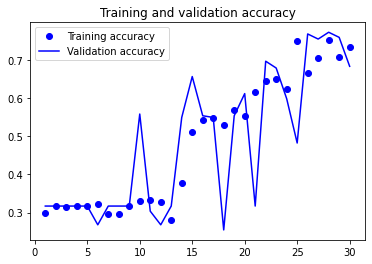

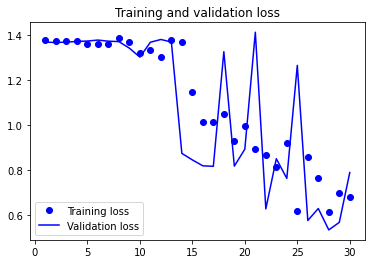

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["sparse_categorical_accuracy"]
val_accuracy = history.history["val_sparse_categorical_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 2s 258ms/step - loss: 0.5340 - sparse_categorical_accuracy: 0.7723
Test accuracy: 0.772


#SECOND APPROACH:small convnet Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["sparse_categorical_accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
29/29 [==============================] - 10s 297ms/step - loss: 1.3764 - sparse_categorical_accuracy: 0.2997 - val_loss: 1.3687 - val_sparse_categorical_accuracy: 0.3170
Epoch 2/100
29/29 [==============================] - 8s 262ms/step - loss: 1.3720 - sparse_categorical_accuracy: 0.3174 - val_loss: 1.3718 - val_sparse_categorical_accuracy: 0.3170
Epoch 3/100
29/29 [==============================] - 8s 268ms/step - loss: 1.3748 - sparse_categorical_accuracy: 0.3119 - val_loss: 1.3694 - val_sparse_categorical_accuracy: 0.3170
Epoch 4/100
29/29 [==============================] - 8s 275ms/step - loss: 1.3717 - sparse_categorical_accuracy: 0.3174 - val_loss: 1.3687 - val_sparse_categorical_accuracy: 0.3170
Epoch 5/100
29/29 [==============================] - 8s 272ms/step - loss: 1.3708 - sparse_categorical_accuracy: 0.3185 - val_loss: 1.3201 - val_sparse_categorical_accuracy: 0.4911
Epoch 6/100
29/29 [==============================] - 8s 266ms/step - loss: 1.2903 - sparse_cat

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 2s 242ms/step - loss: 0.4869 - sparse_categorical_accuracy: 0.8125
Test accuracy: 0.812


## Leveraging a pretrained model

#THIRD APPROACH: Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(180,180, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [ ]:
import numpy as np
batch_size=32
def get_features_and_labels(dataset,sample_count):
    all_features = []
    all_labels = []
    i=0
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
        i=i+1
        if i  >= sample_count:
          break
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset,901)
print("train_features and labels collected")

1/1 [==============================] - 0s 22ms/step
train_features and labels collected


In [ ]:
val_features, val_labels =  get_features_and_labels(validation_dataset,224)
print("val_features and labels collected")

1/1 [==============================] - 0s 22ms/step
val_features and labels collected


In [ ]:
train_features.shape

(27995, 5, 5, 512)

**Defining and training the densely connected classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["sparse_categorical_accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=50,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/50
875/875 [==============================] - 5s 5ms/step - loss: 2.7588 - sparse_categorical_accuracy: 0.3048 - val_loss: 1.3688 - val_sparse_categorical_accuracy: 0.3527
Epoch 2/50
875/875 [==============================] - 4s 5ms/step - loss: 1.3276 - sparse_categorical_accuracy: 0.3707 - val_loss: 1.4076 - val_sparse_categorical_accuracy: 0.3482
Epoch 3/50
875/875 [==============================] - 4s 5ms/step - loss: 1.2662 - sparse_categorical_accuracy: 0.4231 - val_loss: 1.2224 - val_sparse_categorical_accuracy: 0.4688
Epoch 4/50
875/875 [==============================] - 5s 6ms/step - loss: 1.2183 - sparse_categorical_accuracy: 0.4550 - val_loss: 1.8820 - val_sparse_categorical_accuracy: 0.2679
Epoch 5/50
875/875 [==============================] - 4s 5ms/step - loss: 1.1845 - sparse_categorical_accuracy: 0.4753 - val_loss: 1.2792 - val_sparse_categorical_accuracy: 0.4509
Epoch 6/50
875/875 [==============================] - 4s 5ms/step - loss: 1.1554 - sparse_categorica

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(val_features, val_labels)
print(f"Test accuracy: {test_acc:.3f}")

224/224 [==============================] - 1s 3ms/step - loss: 1.0832 - sparse_categorical_accuracy: 0.5848
Test accuracy: 0.585


**Plotting the results**

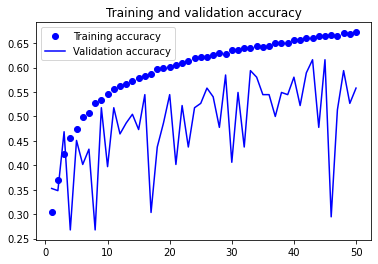

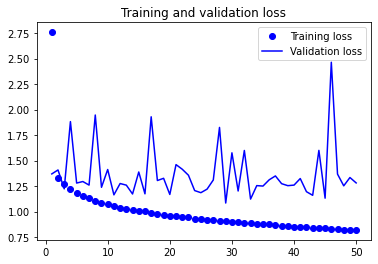

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["sparse_categorical_accuracy"]
val_acc = history.history["val_sparse_categorical_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#FOURTH APPROACH: Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["sparse_categorical_accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
29/29 [==============================] - 11s 338ms/step - loss: 2.7605 - sparse_categorical_accuracy: 0.2475 - val_loss: 1.3809 - val_sparse_categorical_accuracy: 0.2232
Epoch 2/50
29/29 [==============================] - 9s 299ms/step - loss: 1.3866 - sparse_categorical_accuracy: 0.3152 - val_loss: 1.3842 - val_sparse_categorical_accuracy: 0.3170
Epoch 3/50
29/29 [==============================] - 9s 298ms/step - loss: 1.3857 - sparse_categorical_accuracy: 0.3163 - val_loss: 1.3820 - val_sparse_categorical_accuracy: 0.3170
Epoch 4/50
29/29 [==============================] - 9s 310ms/step - loss: 1.3846 - sparse_categorical_accuracy: 0.3152 - val_loss: 1.3800 - val_sparse_categorical_accuracy: 0.3170
Epoch 5/50
29/29 [==============================] - 9s 310ms/step - loss: 1.3792 - sparse_categorical_accuracy: 0.3174 - val_loss: 1.3782 - val_sparse_categorical_accuracy: 0.3170
Epoch 6/50
29/29 [==============================] - 9s 310ms/step - loss: 1.3776 - sparse_categoric

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 2s 312ms/step - loss: 1.3686 - sparse_categorical_accuracy: 0.3170
Test accuracy: 0.317


#FIFTH APPROACH: Fine-tuning a pretrained model

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["sparse_categorical_accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
29/29 [==============================] - 12s 338ms/step - loss: 1.3812 - sparse_categorical_accuracy: 0.3396 - val_loss: 1.2948 - val_sparse_categorical_accuracy: 0.4107
Epoch 2/30
29/29 [==============================] - 9s 314ms/step - loss: 1.3583 - sparse_categorical_accuracy: 0.3374 - val_loss: 1.3008 - val_sparse_categorical_accuracy: 0.2991
Epoch 3/30
29/29 [==============================] - 9s 315ms/step - loss: 1.3167 - sparse_categorical_accuracy: 0.3618 - val_loss: 1.3398 - val_sparse_categorical_accuracy: 0.3661
Epoch 4/30
29/29 [==============================] - 11s 375ms/step - loss: 1.3311 - sparse_categorical_accuracy: 0.3685 - val_loss: 1.2710 - val_sparse_categorical_accuracy: 0.3929
Epoch 5/30
29/29 [==============================] - 10s 350ms/step - loss: 1.3109 - sparse_categorical_accuracy: 0.3718 - val_loss: 1.5279 - val_sparse_categorical_accuracy: 0.2589
Epoch 6/30
29/29 [==============================] - 10s 316ms/step - loss: 1.3054 - sparse_catego

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 4s 477ms/step - loss: 1.1925 - accuracy: 0.4777
Test accuracy: 0.478


# SIXTH APPROACH:ResNet50

In [ ]:
resnet50 = keras.applications.resnet
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(180,180,3))
for layer in conv_model.layers:
    layer.trainable = False
x = keras.layers.Flatten()(conv_model.output)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(256, activation='relu')(x)
predictions = keras.layers.Dense(4, activation='softmax')(x)
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizati

In [ ]:
full_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(),
                  metrics=['sparse_categorical_accuracy'])
history = full_model.fit(
    train_dataset, 
    validation_data = validation_dataset,
    workers=10,
    epochs=30

)

Epoch 1/30
29/29 [==============================] - 13s 317ms/step - loss: 1.6982 - sparse_categorical_accuracy: 0.4162 - val_loss: 1.2659 - val_sparse_categorical_accuracy: 0.3750
Epoch 2/30
29/29 [==============================] - 9s 282ms/step - loss: 0.9649 - sparse_categorical_accuracy: 0.6082 - val_loss: 0.9348 - val_sparse_categorical_accuracy: 0.6384
Epoch 3/30
29/29 [==============================] - 9s 272ms/step - loss: 0.7707 - sparse_categorical_accuracy: 0.7159 - val_loss: 0.8704 - val_sparse_categorical_accuracy: 0.6161
Epoch 4/30
29/29 [==============================] - 9s 265ms/step - loss: 0.7720 - sparse_categorical_accuracy: 0.6848 - val_loss: 0.7288 - val_sparse_categorical_accuracy: 0.7321
Epoch 5/30
29/29 [==============================] - 10s 259ms/step - loss: 0.7606 - sparse_categorical_accuracy: 0.6815 - val_loss: 0.9016 - val_sparse_categorical_accuracy: 0.5848
Epoch 6/30
29/29 [==============================] - 10s 257ms/step - loss: 0.7225 - sparse_categor

## Summary

In [ ]:
!jupyter nbconvert MBA06_Module3_Assignment3_AnandMohan.ipynb

[NbConvertApp] Converting notebook MBA06_Module3_Assignment3_AnandMohan.ipynb to html
[NbConvertApp] Writing 621034 bytes to MBA06_Module3_Assignment3_AnandMohan.html
